# LET'S GROW MORE INTERNSHIP -2023 APRIL
## NAME=SWARAJ SOLANKE¶¶
## task 4:Exploratory Data Analysis on Dataset - Terrorism 

# importing libraries 

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os


# reading dataset 

In [26]:
df=pd.read_csv('global dataset.csv', encoding='ISO-8859-1')

C:\Users\rajpu\AppData\Local\Temp\ipykernel_13144\1238836208.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('global dataset.csv', encoding='ISO-8859-1')


In [27]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [31]:
#feature of dataset
print(df.columns)

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


<AxesSubplot:>

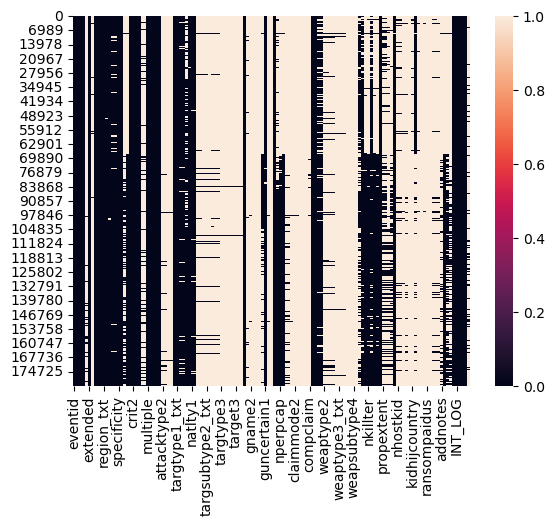

In [33]:
sn.heatmap(df.isnull())

In [34]:
plt.show()

# explorative data-analysis 

In [35]:
# values count of region
df.region_txt.value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

# taking year 1970 to 2010 number attacks happend.

<Figure size 600x600 with 0 Axes>

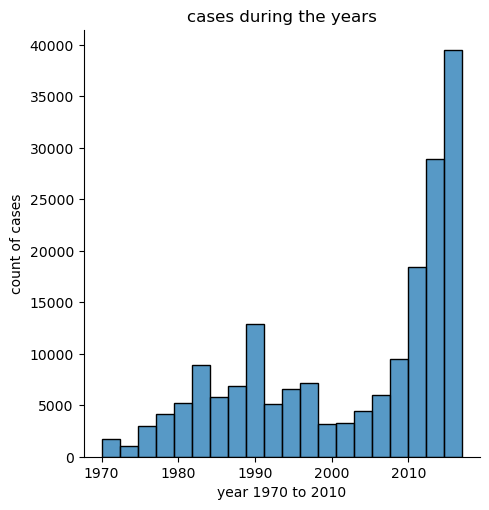

In [38]:
#cases during the year
plt.figure(figsize=(6,6))
sn.displot(df.iyear,bins=20)
plt.title("cases during the years")
plt.xlabel("year 1970 to 2010")
plt.ylabel("count of cases")
plt.show()


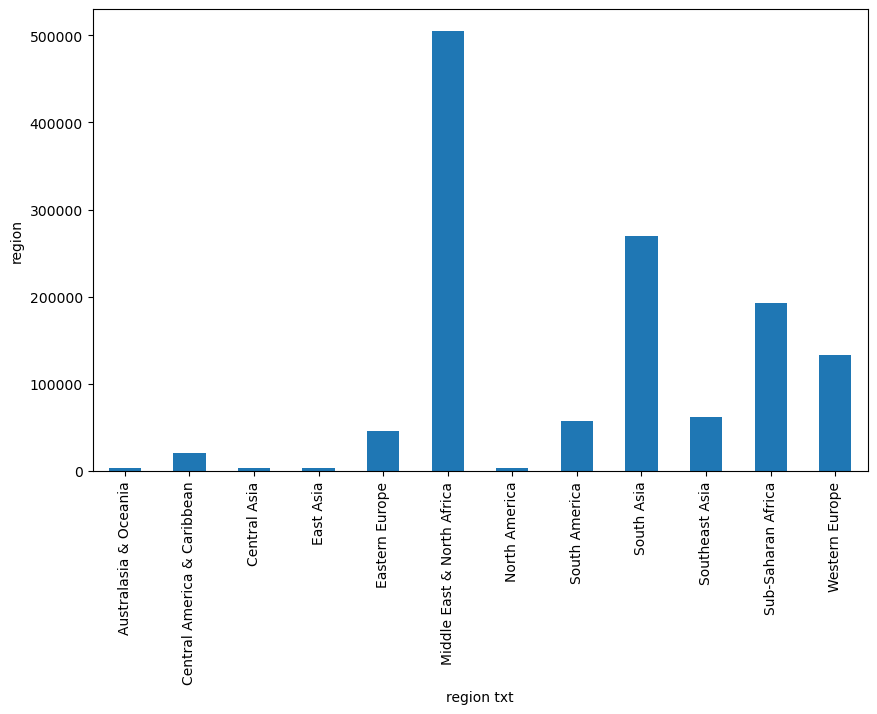

In [42]:
# region txt vs region
plt.figure(figsize=(10,6))
groups=df.groupby(["region_txt"])["region"].sum()
groups.plot.bar()
plt.xlabel("region txt")
plt.ylabel("region")
plt.show()

## from the visualization we can find that major terrorism happened in middle east and north africa followed by south asia and sub saharan afraica

In [51]:
#attack type 1 as per region and country
attack_region=pd.pivot_table(data=df,values="attacktype1",index=["region_txt","country_txt"],aggfunc=[np.sum,np.mean],fill_value=0)
print(attack_region)

                                                 sum        mean
                                         attacktype1 attacktype1
region_txt            country_txt                               
Australasia & Oceania Australia                  522    4.578947
                      Fiji                        86    5.058824
                      French Polynesia            22    7.333333
                      New Caledonia              113    3.645161
                      New Hebrides                 3    3.000000
...                                              ...         ...
Western Europe        Sweden                     648    4.909091
                      Switzerland                379    3.414414
                      United Kingdom           15005    2.866285
                      Vatican City                 1    1.000000
                      West Germany (FRG)        2146    3.966728

[205 rows x 2 columns]


In [53]:
 attack_region.query('region_txt==[Australasia & Oceania']')

sum        mean
                                        attacktype1 attacktype1
region_txt            country_txt                              
Australasia & Oceania Australia                 522    4.578947
                      Fiji                       86    5.058824
                      French Polynesia           22    7.333333
                      New Caledonia             113    3.645161
                      New Hebrides                3    3.000000
                      New Zealand               116    5.800000
                      Papua New Guinea          324    3.640449
                      Solomon Islands             8    2.000000
                      Vanuatu                    11    5.500000
                      Wallis and Futuna           7    7.000000

<AxesSubplot:ylabel='Count'>

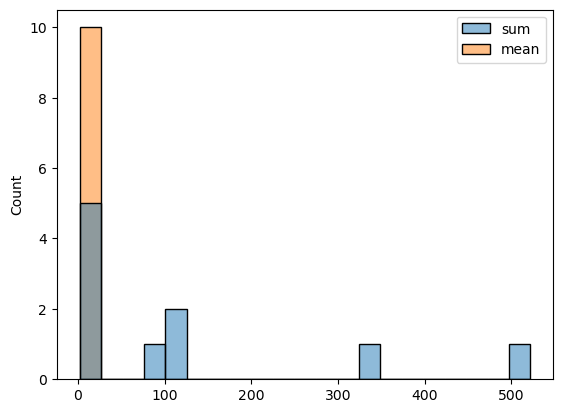

In [54]:
# visuals the attacks of autrailasia and oceania
sn.histplot(attack_region.query('region_txt==["Australasia & Oceania"]'))

In [56]:
#attack in south asia country india-total and avarge 
attack_region.query('country_txt==["India"]' )

,,sum,mean
,,attacktype1,attacktype1
region_txt,country_txt,,
South Asia,India,40492,3.385619


In [57]:
#attack in middle east and north africa =total and avarge 
attack_region.query("region_txt==['Middle East & North Africa']")

sum        mean
                                                    attacktype1 attacktype1
region_txt                 country_txt                                     
Middle East & North Africa Algeria                         7861    2.865840
                           Bahrain                          760    3.671498
                           Egypt                           7171    2.892699
                           International                      3    3.000000
                           Iran                            2122    3.102339
                           Iraq                           76314    3.097662
                           Israel                          6536    2.994045
                           Jordan                           355    3.141593
                           Kuwait                           260    3.421053
                           Lebanon                         7263    2.930993
                           Libya                           8416    3.742108
                           Morocco                          141    3.916667
                           North Yemen                       10    1.666667
                           Qatar                             29    4.142857
                           Saudi Arabia                    1119    3.016173
                           South Yemen                        7    3.500000
                           Syria                           7917    3.597001
                           Tunisia                          351    3.220183
                           Turkey                         13208    3.077353
                           United Arab Emirates              59    2.681818
                           West Bank and Gaza Strip        6617    2.971262
                           Western Sahara                    21    4.200000
                           Yemen                          12224    3.652226

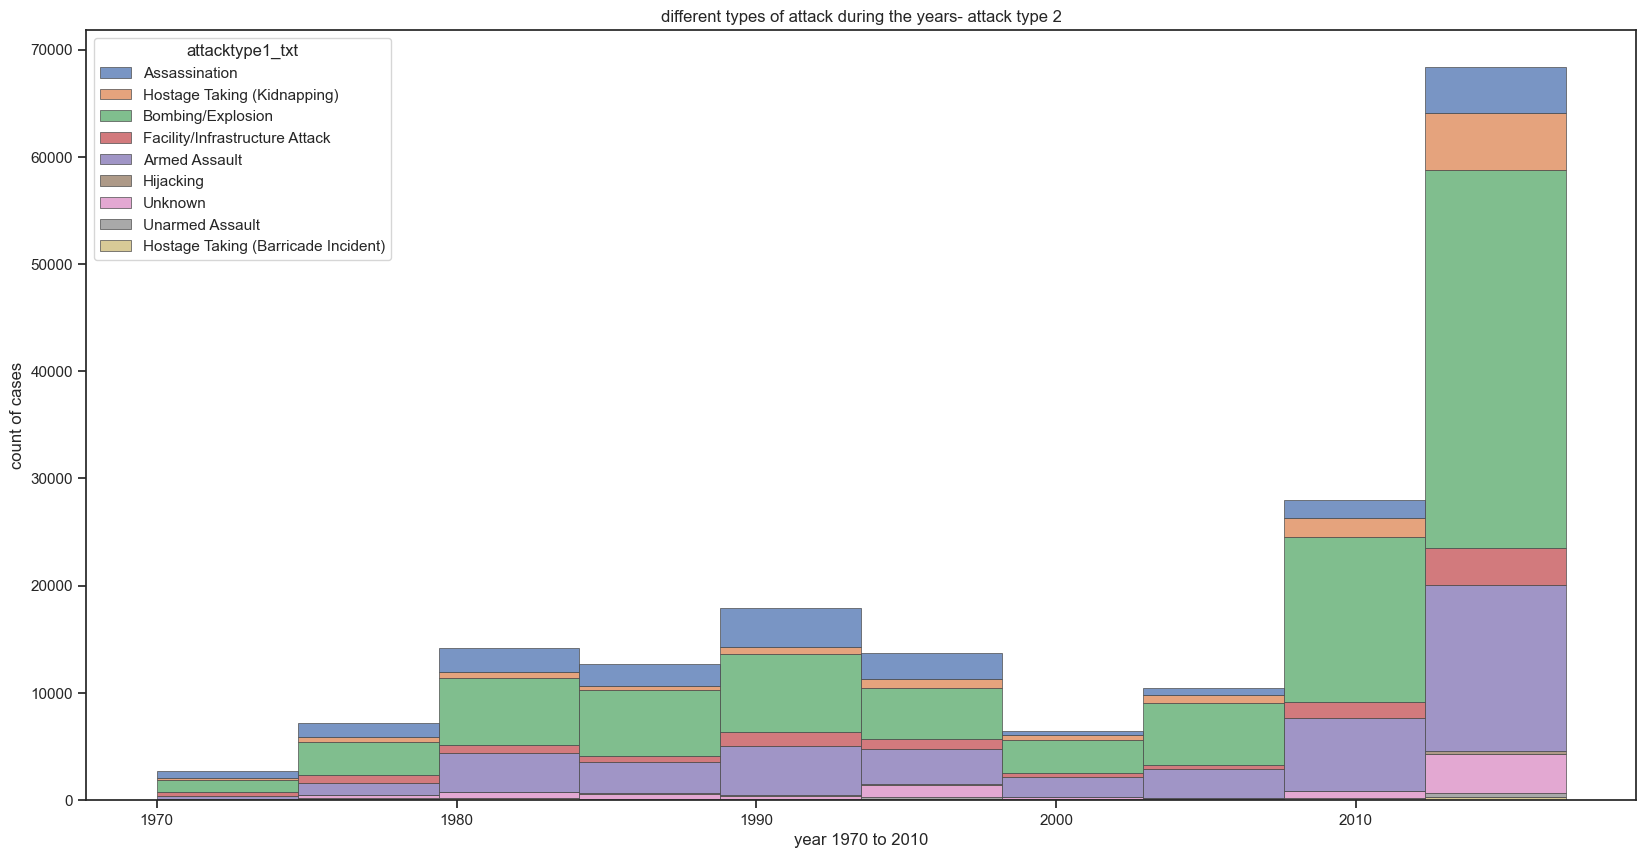

In [60]:
# different type of attack during the yers 
sn.set_theme(style="ticks")
plt.figure(figsize=[20,10])
sn.histplot(data=df,x="iyear",
           bins=10,
           multiple="stack",
           #palette="light:m_r",
           edgecolor=".3",
           linewidth=.5,
           #log scale=true
           hue="attacktype1_txt")
plt.title("different types of attack during the years- attack type 2")
plt.xlabel("year 1970 to 2010")
plt.ylabel("count of cases")
plt.show()

# from the above visualization we found that the maximum attacks happened in the year during 2010.during the year attacks were majorly due bombing/explosion was due to armed assualt.


<Figure size 1000x600 with 0 Axes>

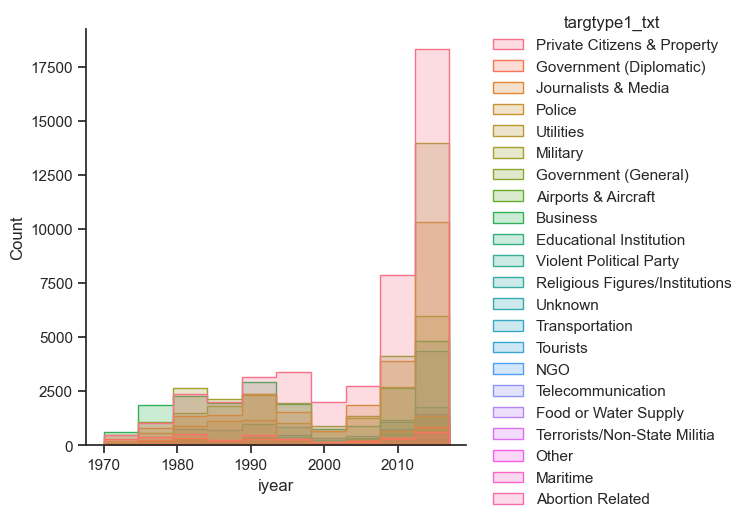

In [65]:
# different types of attacks during the year-attack type2
#sn .set _theme (style=ticks)
plt.figure(figsize=[10,6])
sn.displot(data=df,x="iyear",bins=10,
          #multiple ="stacks",
          #palette ="light:m_r")
          hue="targtype1_txt",
        element="step")

# from above visualization we foud that most of attack were held on government diplomatics and private ,citizen and property.